# Data pre-processing for Machine Learning

## Step 1: Load the dataset

In [2]:
import pandas as pd
import numpy as np

df_uncleaned = pd.read_excel('PRE2013.xlsx')
df_uncleaned

,Day,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,VPD,Ustar
0,--,--,umolm-2s-1,Wm-2,Wm-2,Wm-2,degC,degC,%,hPa,ms-1
1,1,0.5,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2,1,1,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
3,1,1.5,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
4,1,2,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
...,...,...,...,...,...,...,...,...,...,...,...
17516,365,22,1.317576,-2.113446,-4.222929,-1.650576,24.11463,29.31614,84.10452,4.693953,0.341839
17517,365,22.5,0.234337,-17.096266,1.974016,-2.103711,23.99404,29.22911,86.27364,4.024035,0.374856
17518,365,23,-0.224384,-10.566178,-5.732129,-2.074909,23.87093,29.14392,87.43149,3.657315,0.360931
17519,365,23.5,1.597789,-9.588491,-4.534221,-2.309459,23.6706,29.05899,88.96199,3.173296,0.431153


## Step 2: Check the data

In [43]:
df_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Day     17521 non-null  object
 1   Hour    17521 non-null  object
 2   NEE     17521 non-null  object
 3   LE      17521 non-null  object
 4   H       17521 non-null  object
 5   Rg      17521 non-null  object
 6   Tair    17521 non-null  object
 7   Tsoil   17521 non-null  object
 8   rH      17521 non-null  object
 9   VPD     17521 non-null  object
 10  Ustar   17521 non-null  object
dtypes: object(11)
memory usage: 1.5+ MB


In [44]:
df_uncleaned.isnull().sum()

Day      0
Hour     0
NEE      0
LE       0
H        0
Rg       0
Tair     0
Tsoil    0
rH       0
VPD      0
Ustar    0
dtype: int64

In [46]:
df_uncleaned.isna().sum()

Day      0
Hour     0
NEE      0
LE       0
H        0
Rg       0
Tair     0
Tsoil    0
rH       0
VPD      0
Ustar    0
dtype: int64

Up to now, there are 3 issues:
1. The data inside the dataframe are objects rather than float or integers. This issue disables the possibility of using mathematical methods to that dataframe.
2. The first raw contains the units of the magnitudes on the row above. This would have probably caused the former issue.
3. It seems not to have nulls nor NaNs. In fact, the -9999 values are the NaNs.

## Step 3: Standarize the dataset

In [3]:
'''The dataframe df will not be replaced doing this way
#df.replace(-9999, np.nan)
so lets replace into a new df
'''
df_withNaN = df_uncleaned.replace(to_replace=-9999, value = np.nan)
df_withNaN

,Day,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,VPD,Ustar
0,--,--,umolm-2s-1,Wm-2,Wm-2,Wm-2,degC,degC,%,hPa,ms-1
1,1,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
17516,365,22,1.317576,-2.113446,-4.222929,-1.650576,24.11463,29.31614,84.10452,4.693953,0.341839
17517,365,22.5,0.234337,-17.096266,1.974016,-2.103711,23.99404,29.22911,86.27364,4.024035,0.374856
17518,365,23,-0.224384,-10.566178,-5.732129,-2.074909,23.87093,29.14392,87.43149,3.657315,0.360931
17519,365,23.5,1.597789,-9.588491,-4.534221,-2.309459,23.6706,29.05899,88.96199,3.173296,0.431153


In [4]:
'''
It also doesnt work unless I assign the result to a new one df
'''
df_withoutNaN = df_withNaN.dropna().reset_index(drop=True)
df_withoutNaN

,Day,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,VPD,Ustar
0,--,--,umolm-2s-1,Wm-2,Wm-2,Wm-2,degC,degC,%,hPa,ms-1
1,8,9.5,-1.282251,19.633976,293.5131,467.1249,28.50663,28.717215,59.81609,15.396101,0.684502
2,8,10,-5.457097,55.989938,343.4997,567.2656,29.64457,29.11375,54.25453,18.724118,0.586166
3,8,10.5,-3.174246,17.742429,298.8176,510.0382,30.07509,29.542745,50.37691,20.822337,0.60327
4,8,11,-3.36215,-14.486921,308.6841,562.1135,30.6643,29.96738,47.96687,22.586022,0.609596
...,...,...,...,...,...,...,...,...,...,...,...
12695,365,22,1.317576,-2.113446,-4.222929,-1.650576,24.11463,29.31614,84.10452,4.693953,0.341839
12696,365,22.5,0.234337,-17.096266,1.974016,-2.103711,23.99404,29.22911,86.27364,4.024035,0.374856
12697,365,23,-0.224384,-10.566178,-5.732129,-2.074909,23.87093,29.14392,87.43149,3.657315,0.360931
12698,365,23.5,1.597789,-9.588491,-4.534221,-2.309459,23.6706,29.05899,88.96199,3.173296,0.431153


In [5]:
df_withoutNaNandUnits = df_withoutNaN[1:-1]
df_withoutNaNandUnits

,Day,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,VPD,Ustar
1,8,9.5,-1.282251,19.633976,293.5131,467.1249,28.50663,28.717215,59.81609,15.396101,0.684502
2,8,10,-5.457097,55.989938,343.4997,567.2656,29.64457,29.11375,54.25453,18.724118,0.586166
3,8,10.5,-3.174246,17.742429,298.8176,510.0382,30.07509,29.542745,50.37691,20.822337,0.60327
4,8,11,-3.36215,-14.486921,308.6841,562.1135,30.6643,29.96738,47.96687,22.586022,0.609596
5,8,11.5,-3.737496,11.66765,383.1186,489.9342,31.03038,30.376165,45.71235,24.064133,0.564155
...,...,...,...,...,...,...,...,...,...,...,...
12694,365,21.5,1.105137,19.396823,-5.08671,-2.153937,24.05438,29.41369,81.65815,5.396727,0.37275
12695,365,22,1.317576,-2.113446,-4.222929,-1.650576,24.11463,29.31614,84.10452,4.693953,0.341839
12696,365,22.5,0.234337,-17.096266,1.974016,-2.103711,23.99404,29.22911,86.27364,4.024035,0.374856
12697,365,23,-0.224384,-10.566178,-5.732129,-2.074909,23.87093,29.14392,87.43149,3.657315,0.360931


In [8]:
'''
As can be seen here, the describe method doesnt report all the info because of having objects as data
Each column should be decoded into float or integer before going on.
'''
df_withoutNaNandUnits.describe()

,Day,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,VPD,Ustar
count,12698,12698.0,12698.000000,12698.000000,12698.0000,12698.000000,12698.00000,12698.000000,12698.0000,12698.0,12698.000000
unique,315,48.0,12697.000000,12697.000000,12692.0000,12687.000000,12640.00000,12667.000000,12636.0000,12561.0,12687.000000
top,130,17.5,2.132852,98.859694,271.9746,-2.119701,30.53282,29.265335,100.0377,0.0,0.437753
freq,48,289.0,2.000000,2.000000,2.0000,2.000000,2.00000,3.000000,6.0000,138.0,2.000000


In [9]:
'''
In case still there is any doubt...
'''
print(df_withoutNaNandUnits.dtypes)

Day      object
Hour     object
NEE      object
LE       object
H        object
Rg       object
Tair     object
Tsoil    object
rH       object
VPD      object
Ustar    object
dtype: object


In [10]:
'''
We proceed with the conversion, column by column
'''
df_withoutNaNandUnits['Day']   = df_withoutNaNandUnits['Day'].astype(int)
df_withoutNaNandUnits['Hour']  = df_withoutNaNandUnits['Hour'].astype(float)
df_withoutNaNandUnits['NEE']   = df_withoutNaNandUnits['NEE'].astype(float)
df_withoutNaNandUnits['LE']    = df_withoutNaNandUnits['LE'].astype(float)
df_withoutNaNandUnits['H']     = df_withoutNaNandUnits['H'].astype(float)
df_withoutNaNandUnits['Rg']    = df_withoutNaNandUnits['Rg'].astype(float)
df_withoutNaNandUnits['Tair']  = df_withoutNaNandUnits['Tair'].astype(float)
df_withoutNaNandUnits['Tsoil'] = df_withoutNaNandUnits['Tsoil'].astype(float)
df_withoutNaNandUnits['rH']    = df_withoutNaNandUnits['rH'].astype(float)
df_withoutNaNandUnits['VPD']   = df_withoutNaNandUnits['VPD'].astype(float)
df_withoutNaNandUnits['Ustar'] = df_withoutNaNandUnits['Ustar'].astype(float)
df_withoutNaNandUnits

/tmp/ipykernel_14546/626383233.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_withoutNaNandUnits['Day']   = df_withoutNaNandUnits['Day'].astype(int)
/tmp/ipykernel_14546/626383233.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_withoutNaNandUnits['Hour']  = df_withoutNaNandUnits['Hour'].astype(float)
/tmp/ipykernel_14546/626383233.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,Day,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,VPD,Ustar
1,8,9.5,-1.282251,19.633976,293.513100,467.124900,28.50663,28.717215,59.81609,15.396101,0.684502
2,8,10.0,-5.457097,55.989938,343.499700,567.265600,29.64457,29.113750,54.25453,18.724118,0.586166
3,8,10.5,-3.174246,17.742429,298.817600,510.038200,30.07509,29.542745,50.37691,20.822337,0.603270
4,8,11.0,-3.362150,-14.486921,308.684100,562.113500,30.66430,29.967380,47.96687,22.586022,0.609596
5,8,11.5,-3.737496,11.667650,383.118600,489.934200,31.03038,30.376165,45.71235,24.064133,0.564155
...,...,...,...,...,...,...,...,...,...,...,...
12694,365,21.5,1.105137,19.396823,-5.086710,-2.153937,24.05438,29.413690,81.65815,5.396727,0.372750
12695,365,22.0,1.317576,-2.113446,-4.222929,-1.650576,24.11463,29.316140,84.10452,4.693953,0.341839
12696,365,22.5,0.234337,-17.096266,1.974016,-2.103711,23.99404,29.229110,86.27364,4.024035,0.374856
12697,365,23.0,-0.224384,-10.566178,-5.732129,-2.074909,23.87093,29.143920,87.43149,3.657315,0.360931


In [11]:
'''
Now it is ok!
'''
df_withoutNaNandUnits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12698 entries, 1 to 12698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     12698 non-null  int64  
 1   Hour    12698 non-null  float64
 2   NEE     12698 non-null  float64
 3   LE      12698 non-null  float64
 4   H       12698 non-null  float64
 5   Rg      12698 non-null  float64
 6   Tair    12698 non-null  float64
 7   Tsoil   12698 non-null  float64
 8   rH      12698 non-null  float64
 9   VPD     12698 non-null  float64
 10  Ustar   12698 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.1 MB


## Step 4: Statistical analysis

In [12]:
'''
Now it goes
It seems to be no outliers
'''
df_withoutNaNandUnits.describe()

,Day,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,VPD,Ustar
count,12698.000000,12698.000000,12698.000000,12698.000000,12698.000000,12698.000000,12698.000000,12698.000000,12698.000000,12698.000000,12698.000000
mean,177.619940,12.653016,-0.519348,21.203777,86.177114,190.033540,26.723424,27.968602,72.729323,10.875000,0.419865
std,112.541575,6.859770,4.007970,40.248518,132.594249,249.604016,3.480663,2.856498,18.860919,9.374398,0.175950
min,8.000000,0.500000,-14.975209,-49.953709,-46.526950,-4.238395,16.396480,21.610355,26.474730,0.000000,0.000000
25%,76.000000,7.000000,-2.933721,-2.676834,-7.539441,-1.916214,23.968520,25.772622,56.861928,3.176921,0.295565
50%,153.000000,13.000000,0.708028,5.482510,5.298768,10.553825,26.088935,28.107300,77.431855,7.409081,0.422367
75%,292.000000,18.500000,1.884775,30.710592,167.179000,378.359900,29.399460,30.256099,89.144790,17.362999,0.552979
max,365.000000,24.000000,9.996666,199.862835,599.594100,915.810200,36.873290,34.449420,100.058600,41.533249,1.002762


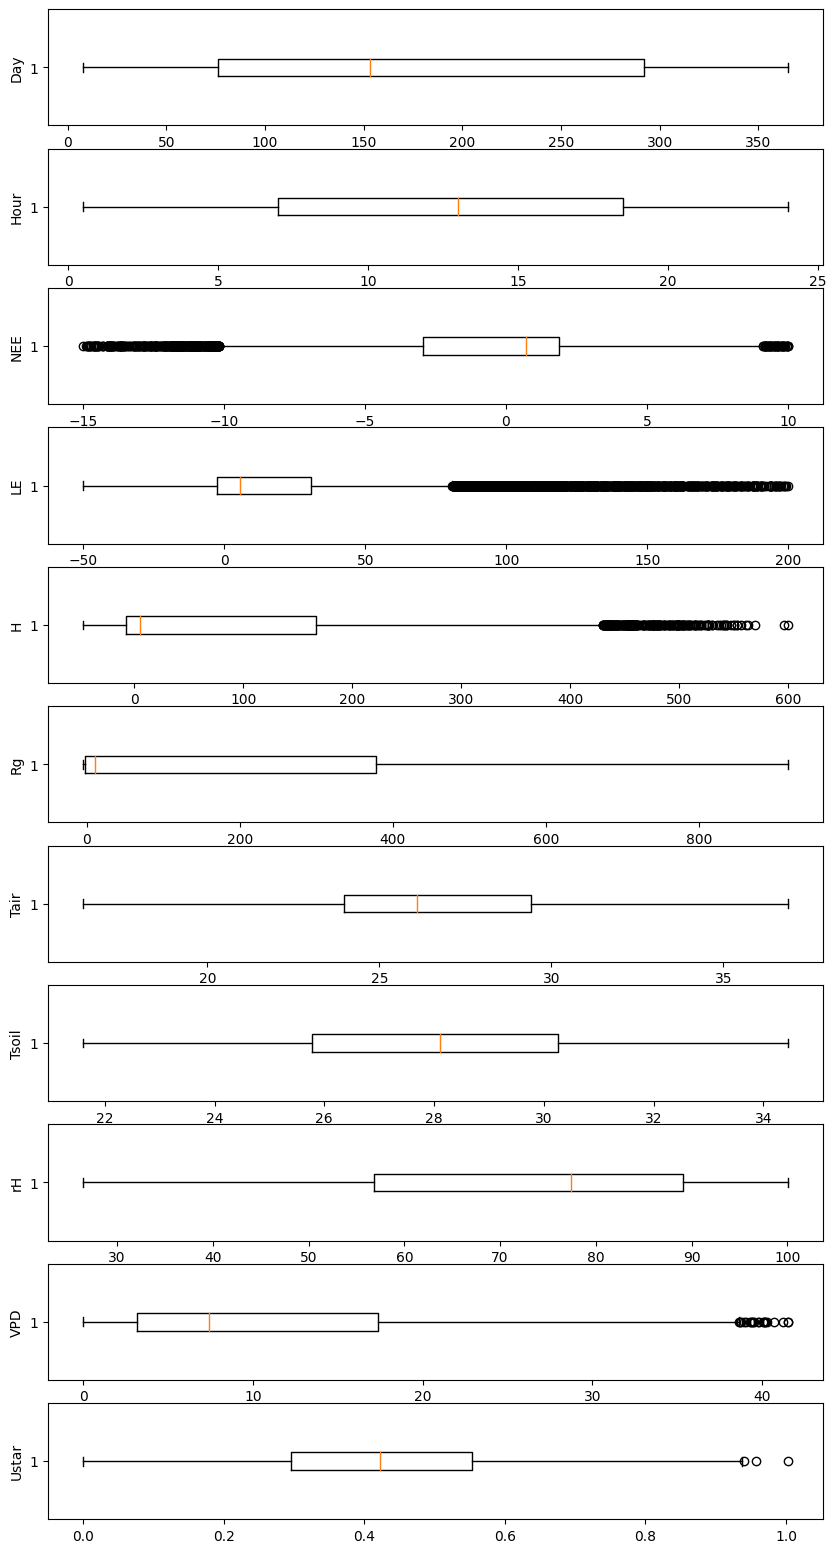

In [14]:
'''
To double check for outliers I display box plots.
The result brings up a lot of outliers for NEE, LE, H and VPD time series and few por ustar.
I therefore do not consider them as outliers, but rather as extreme values due to excepcional weather conditions:
1. Extreme Rg (no cloud cover) with very high soil moisture, which contributes to extreme NEE, LE and VPD values
2. Extreme Rg (no cloud cover) with very low soil moisture, which contributes to extreme H values.
'''
import matplotlib.pyplot as plt

fig, axs = plt.subplots(11, 1, dpi=100, figsize=(10, 20))
i = 0
for col in df_withoutNaNandUnits.columns:
    axs[i].boxplot(df_withoutNaNandUnits[col], vert=False)
    axs[i].set_ylabel(col)
    i += 1
plt.show()

### Step 4.1: Removing outliers

In [15]:
'''
Lets then only remove the outliers due to extreme ustar
Only 3 rows will be removed from the df
'''

# First, lets identify the quartiles
q1, q3 = np.percentile(df_withoutNaNandUnits['Ustar'], [25, 75])
# Secondly, we use the interquartile range
iqr = q3 - q1
# Then, lets define the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Finally, lets drop the outliers
df_clean = df_withoutNaNandUnits[(df_withoutNaNandUnits['Ustar'] >= lower_bound)
                        & (df_withoutNaNandUnits['Ustar'] <= upper_bound)]
df_clean

,Day,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,VPD,Ustar
1,8,9.5,-1.282251,19.633976,293.513100,467.124900,28.50663,28.717215,59.81609,15.396101,0.684502
2,8,10.0,-5.457097,55.989938,343.499700,567.265600,29.64457,29.113750,54.25453,18.724118,0.586166
3,8,10.5,-3.174246,17.742429,298.817600,510.038200,30.07509,29.542745,50.37691,20.822337,0.603270
4,8,11.0,-3.362150,-14.486921,308.684100,562.113500,30.66430,29.967380,47.96687,22.586022,0.609596
5,8,11.5,-3.737496,11.667650,383.118600,489.934200,31.03038,30.376165,45.71235,24.064133,0.564155
...,...,...,...,...,...,...,...,...,...,...,...
12694,365,21.5,1.105137,19.396823,-5.086710,-2.153937,24.05438,29.413690,81.65815,5.396727,0.372750
12695,365,22.0,1.317576,-2.113446,-4.222929,-1.650576,24.11463,29.316140,84.10452,4.693953,0.341839
12696,365,22.5,0.234337,-17.096266,1.974016,-2.103711,23.99404,29.229110,86.27364,4.024035,0.374856
12697,365,23.0,-0.224384,-10.566178,-5.732129,-2.074909,23.87093,29.143920,87.43149,3.657315,0.360931


### Step 4.2: Correlation analysis

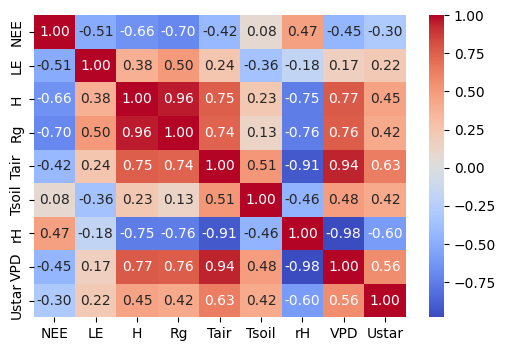

In [32]:
'''
Data is now clean
But it is important to know better the dataset
We can face overfitting issues or extreme processing efforts if having redundant data
Lets display de correlation matrix to check that redundancy
'''
import seaborn as sns
 
plt.figure(dpi=100)
sns.heatmap(df_clean[['NEE', 'LE', 'H', 'Rg', 'Tair', 'Tsoil', 'rH', 'VPD', 'Ustar']].corr(), annot = True, fmt= '.2f', cmap='coolwarm')
plt.show()

In [42]:
'''
To see it clearly, I strip the correlation of NEE and LE with the rest of them.
Focusing only on the environmental variables (Rg, Tair, Tsoil, rH, VPD and Ustar) we see that:
1. NEE anticorrelates mostly with Rg (Global Radiation) and correlates a little with rH (relative Humidity)
2. LE correlates (but not too much) also with Rg (Global Radiation)
3. H correlates almost exactly with Rg (Global Radiation) and a lot with VPD (Vapor Pressure Deficit) and anticorrelates with rH (relative Humidity)
'''

correlaMatrix = df_clean[['NEE', 'LE', 'H', 'Rg', 'Tair', 'Tsoil', 'rH', 'VPD', 'Ustar']].corr()
print(correlaMatrix['NEE'].sort_values(ascending = False))
print('')
print(correlaMatrix['LE'].sort_values(ascending = False))
print('')
print(correlaMatrix['H'].sort_values(ascending = False))

NEE      1.000000
rH       0.466430
Tsoil    0.078091
Ustar   -0.295266
Tair    -0.423844
VPD     -0.446193
LE      -0.513975
H       -0.655345
Rg      -0.701557
Name: NEE, dtype: float64

LE       1.000000
Rg       0.500774
H        0.383858
Tair     0.242166
Ustar    0.222942
VPD      0.165055
rH      -0.184015
Tsoil   -0.362459
NEE     -0.513975
Name: LE, dtype: float64

H        1.000000
Rg       0.960423
VPD      0.774332
Tair     0.753746
Ustar    0.453860
LE       0.383858
Tsoil    0.225935
NEE     -0.655345
rH      -0.750179
Name: H, dtype: float64


## Step 5: Splitting database into independent features and target variables

In [52]:
'''
We now separate the df into input and output components.
As NEE correlates with Rg and rH, we use them as inputs --> X
The goal is to predict NEE, so NEE will be the target --> Y
'''
X = df_clean.drop(columns =['Day', 'Hour', 'NEE', 'LE', 'H', 'Tair', 'Tsoil', 'VPD', 'Ustar'])
Y = df_clean.drop(columns =['Day', 'Hour', 'LE', 'H', 'Rg', 'Tair', 'Tsoil', 'rH', 'VPD', 'Ustar'])
print(X)
print(type(X))
print(Y)

               Rg        rH
1      467.124900  59.81609
2      567.265600  54.25453
3      510.038200  50.37691
4      562.113500  47.96687
5      489.934200  45.71235
...           ...       ...
12694   -2.153937  81.65815
12695   -1.650576  84.10452
12696   -2.103711  86.27364
12697   -2.074909  87.43149
12698   -2.309459  88.96199

[12695 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
            NEE
1     -1.282251
2     -5.457097
3     -3.174246
4     -3.362150
5     -3.737496
...         ...
12694  1.105137
12695  1.317576
12696  0.234337
12697 -0.224384
12698  1.597789

[12695 rows x 1 columns]


## Step 6: Normalization